In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import iqr
pd.options.display.max_rows = 50

In [12]:
airbnb_df = pd.read_csv(r'../airbnb_raw.csv')

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Person Capacity'}>,
        <AxesSubplot:title={'center':'Multiple Rooms'}>,
        <AxesSubplot:title={'center':'Business'}>],
       [<AxesSubplot:title={'center':'Cleanliness Rating'}>,
        <AxesSubplot:title={'center':'Guest Satisfaction'}>,
        <AxesSubplot:title={'center':'Bedrooms'}>,
        <AxesSubplot:title={'center':'City Center (km)'}>],
       [<AxesSubplot:title={'center':'Metro Distance (km)'}>,
        <AxesSubplot:title={'center':'Attraction Index'}>,
        <AxesSubplot:title={'center':'Normalised Attraction Index'}>,
        <AxesSubplot:title={'center':'Restraunt Index'}>],
       [<AxesSubplot:title={'center':'Normalised Restraunt Index'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

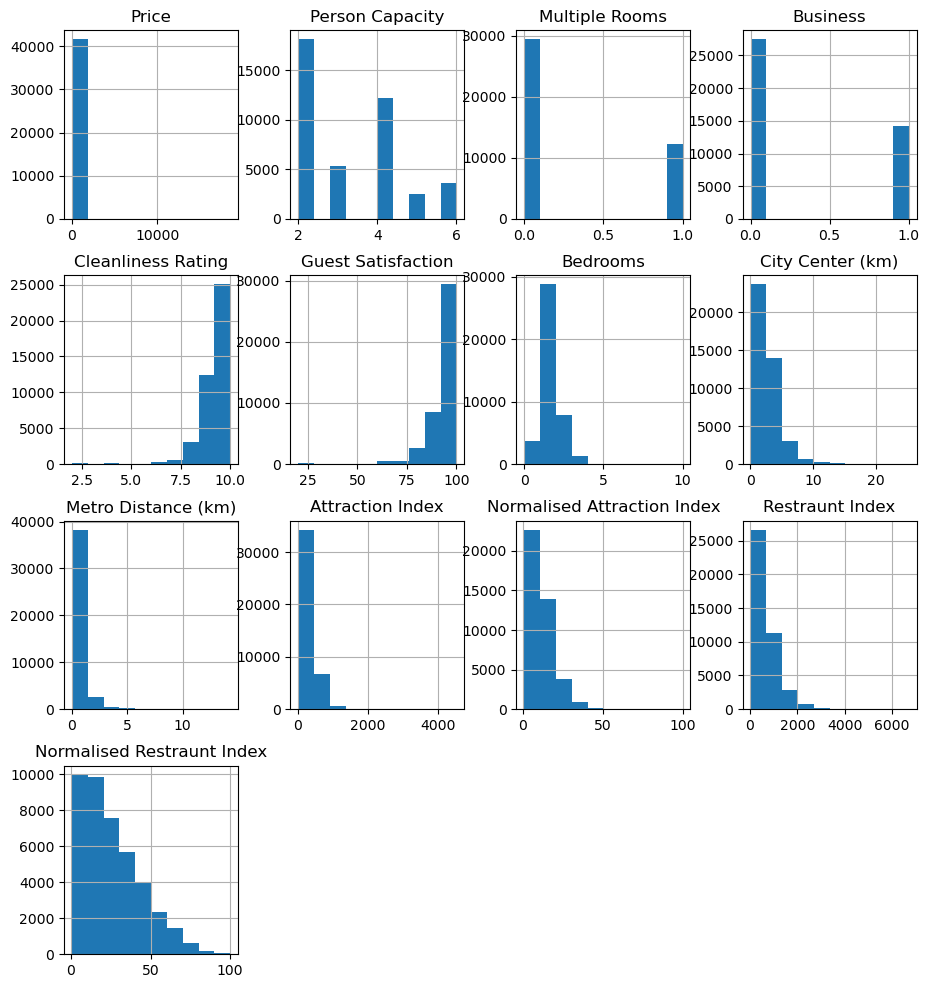

In [13]:
airbnb_df.hist(figsize=(11,12))

In [14]:
airbnb_df.drop(airbnb_df[airbnb_df['Bedrooms'] == 0].index, inplace = True)

In [15]:
airbnb_df_1 = airbnb_df

In [16]:
airbnb_df_1.drop(airbnb_df_1[airbnb_df_1['Price'] > 1100].index, inplace = True)
airbnb_df_1.drop(airbnb_df_1[airbnb_df_1['Bedrooms'] > 3].index, inplace = True)
airbnb_df_1.drop(airbnb_df_1[airbnb_df_1['City Center (km)'] > 15].index, inplace = True)
airbnb_df_1.drop(airbnb_df_1[airbnb_df_1['Metro Distance (km)'] > 4].index, inplace = True)

In [17]:
airbnb_df_2 = airbnb_df_1
airbnb_df_2 = airbnb_df_2.astype({'Multiple Rooms':'float','Business':'float','Bedrooms':'float'})

In [18]:
airbnb_df_3 = airbnb_df_2

In [19]:
airbnb_df_3 = pd.get_dummies(airbnb_df, columns = ['City','Day'], drop_first = True)

In [20]:
enc = OrdinalEncoder(categories=[['Shared room','Private room', 'Entire home/apt']])
airbnb_df_3['Room Type'] = enc.fit_transform(airbnb_df_3[['Room Type']]).reshape((1,-1))[0]

In [21]:
def boolstr_to_floatstr(v):
    if v == 'True':
        return '1'
    elif v == 'False':
        return '0'
    else:
        return v

In [22]:
airbnb_df_3['Shared Room'] = np.vectorize(boolstr_to_floatstr)(airbnb_df_3['Shared Room']).astype(float)
airbnb_df_3['Shared Room'] = np.vectorize(boolstr_to_floatstr)(airbnb_df_3['Shared Room']).astype(float)
airbnb_df_3['Private Room'] = np.vectorize(boolstr_to_floatstr)(airbnb_df_3['Private Room']).astype(float)
airbnb_df_3['Superhost'] = np.vectorize(boolstr_to_floatstr)(airbnb_df_3['Superhost']).astype(float)

In [23]:
airbnb_df_4 = airbnb_df_3.drop(columns=['Attraction Index', 'Restraunt Index', 'Shared Room', 'Private Room','Person Capacity','Normalised Restraunt Index'])

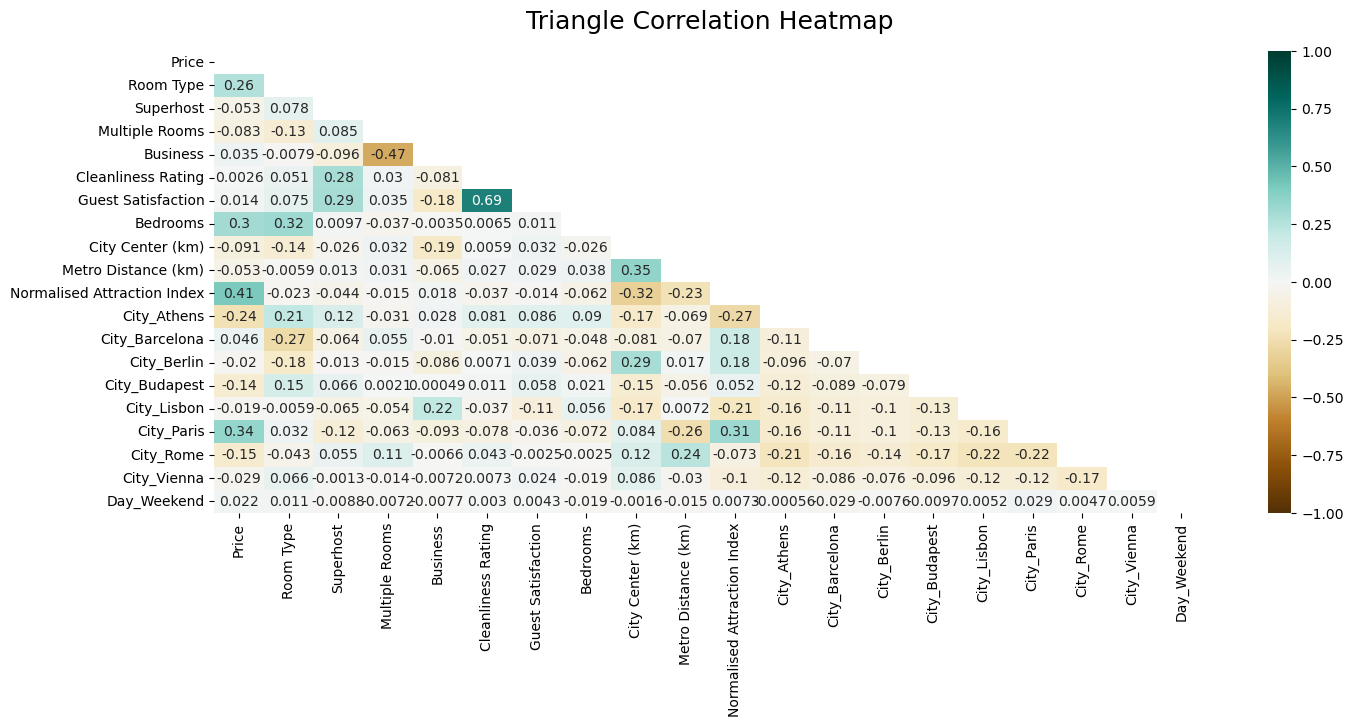

In [24]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(airbnb_df_4.corr(), dtype='bool'))
heatmap = sns.heatmap(airbnb_df_4.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [25]:
airbnb_df_4.drop(airbnb_df_4[airbnb_df_4['Normalised Attraction Index'] >40].index, inplace = True)

In [26]:
airbnb_df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36896 entries, 0 to 41713
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        36896 non-null  float64
 1   Room Type                    36896 non-null  float64
 2   Superhost                    36896 non-null  float64
 3   Multiple Rooms               36896 non-null  int64  
 4   Business                     36896 non-null  int64  
 5   Cleanliness Rating           36896 non-null  float64
 6   Guest Satisfaction           36896 non-null  float64
 7   Bedrooms                     36896 non-null  int64  
 8   City Center (km)             36896 non-null  float64
 9   Metro Distance (km)          36896 non-null  float64
 10  Normalised Attraction Index  36896 non-null  float64
 11  City_Athens                  36896 non-null  uint8  
 12  City_Barcelona               36896 non-null  uint8  
 13  City_Berlin     

In [27]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [28]:
X = airbnb_df_4.drop('Guest Satisfaction', axis=1)
y = np.log(airbnb_df_4['Guest Satisfaction'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,Price,Room Type,Superhost,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekend
1766,743.795843,1.0,0.0,0,1,10.0,1,0.899709,0.801882,23.344710,0,0,0,0,0,0,0,0,1
622,255.665175,1.0,0.0,0,0,9.0,1,2.221383,1.701819,10.733560,0,0,0,0,0,0,0,0,0
5358,102.172334,2.0,0.0,1,0,8.0,1,0.681085,0.588844,5.216535,1,0,0,0,0,0,0,0,1
2713,136.854686,2.0,0.0,1,0,10.0,1,2.088761,0.704363,4.664020,1,0,0,0,0,0,0,0,0
21032,256.566604,2.0,0.0,1,0,10.0,2,1.004913,0.787286,6.613522,0,0,0,0,1,0,0,0,1


In [30]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Guest Satisfaction   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1233.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:15:49   Log-Likelihood:                 27617.
No. Observations:               25827   AIC:                        -5.519e+04
Df Residuals:                   25807   BIC:                        -5.503e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [31]:
airbnb_df_5 = airbnb_df_4.drop(columns=['City Center (km)','Bedrooms','Day_Weekend',])

In [32]:
X = airbnb_df_5.drop('Guest Satisfaction', axis=1)
y = np.log(airbnb_df_5['Guest Satisfaction'])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,Price,Room Type,Superhost,Multiple Rooms,Business,Cleanliness Rating,Metro Distance (km),Normalised Attraction Index,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
1766,743.795843,1.0,0.0,0,1,10.0,0.801882,23.344710,0,0,0,0,0,0,0,0
622,255.665175,1.0,0.0,0,0,9.0,1.701819,10.733560,0,0,0,0,0,0,0,0
5358,102.172334,2.0,0.0,1,0,8.0,0.588844,5.216535,1,0,0,0,0,0,0,0
2713,136.854686,2.0,0.0,1,0,10.0,0.704363,4.664020,1,0,0,0,0,0,0,0
21032,256.566604,2.0,0.0,1,0,10.0,0.787286,6.613522,0,0,0,0,1,0,0,0


In [34]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Guest Satisfaction   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1464.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:15:52   Log-Likelihood:                 27616.
No. Observations:               25827   AIC:                        -5.520e+04
Df Residuals:                   25810   BIC:                        -5.506e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [35]:
airbnb_df_6 = airbnb_df_5.drop(columns=['Price','Normalised Attraction Index','Metro Distance (km)'])

In [36]:
X = airbnb_df_6.drop('Guest Satisfaction', axis=1)
y = np.log(airbnb_df_6['Guest Satisfaction'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,Room Type,Superhost,Multiple Rooms,Business,Cleanliness Rating,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
1766,1.0,0.0,0,1,10.0,0,0,0,0,0,0,0,0
622,1.0,0.0,0,0,9.0,0,0,0,0,0,0,0,0
5358,2.0,0.0,1,0,8.0,1,0,0,0,0,0,0,0
2713,2.0,0.0,1,0,10.0,1,0,0,0,0,0,0,0
21032,2.0,0.0,1,0,10.0,0,0,0,0,1,0,0,0


In [38]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Guest Satisfaction   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1801.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:15:57   Log-Likelihood:                 27612.
No. Observations:               25827   AIC:                        -5.520e+04
Df Residuals:                   25813   BIC:                        -5.508e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7306      0

In [39]:
airbnb_df_7 = airbnb_df_6.drop(columns=['City_Athens','City_Barcelona','City_Berlin','City_Budapest','City_Lisbon','City_Paris','City_Rome','City_Vienna'])

In [40]:
airbnb_df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36896 entries, 0 to 41713
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Room Type           36896 non-null  float64
 1   Superhost           36896 non-null  float64
 2   Multiple Rooms      36896 non-null  int64  
 3   Business            36896 non-null  int64  
 4   Cleanliness Rating  36896 non-null  float64
 5   Guest Satisfaction  36896 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.0 MB


In [45]:
X = airbnb_df_7.drop('Guest Satisfaction', axis=1)
y = np.log(airbnb_df_7['Guest Satisfaction'])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,Room Type,Superhost,Multiple Rooms,Business,Cleanliness Rating
1766,1.0,0.0,0,1,10.0
622,1.0,0.0,0,0,9.0
5358,2.0,0.0,1,0,8.0
2713,2.0,0.0,1,0,10.0
21032,2.0,0.0,1,0,10.0


In [47]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Guest Satisfaction   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     4601.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:16:31   Log-Likelihood:                 27503.
No. Observations:               25827   AIC:                        -5.499e+04
Df Residuals:                   25821   BIC:                        -5.494e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7248      0

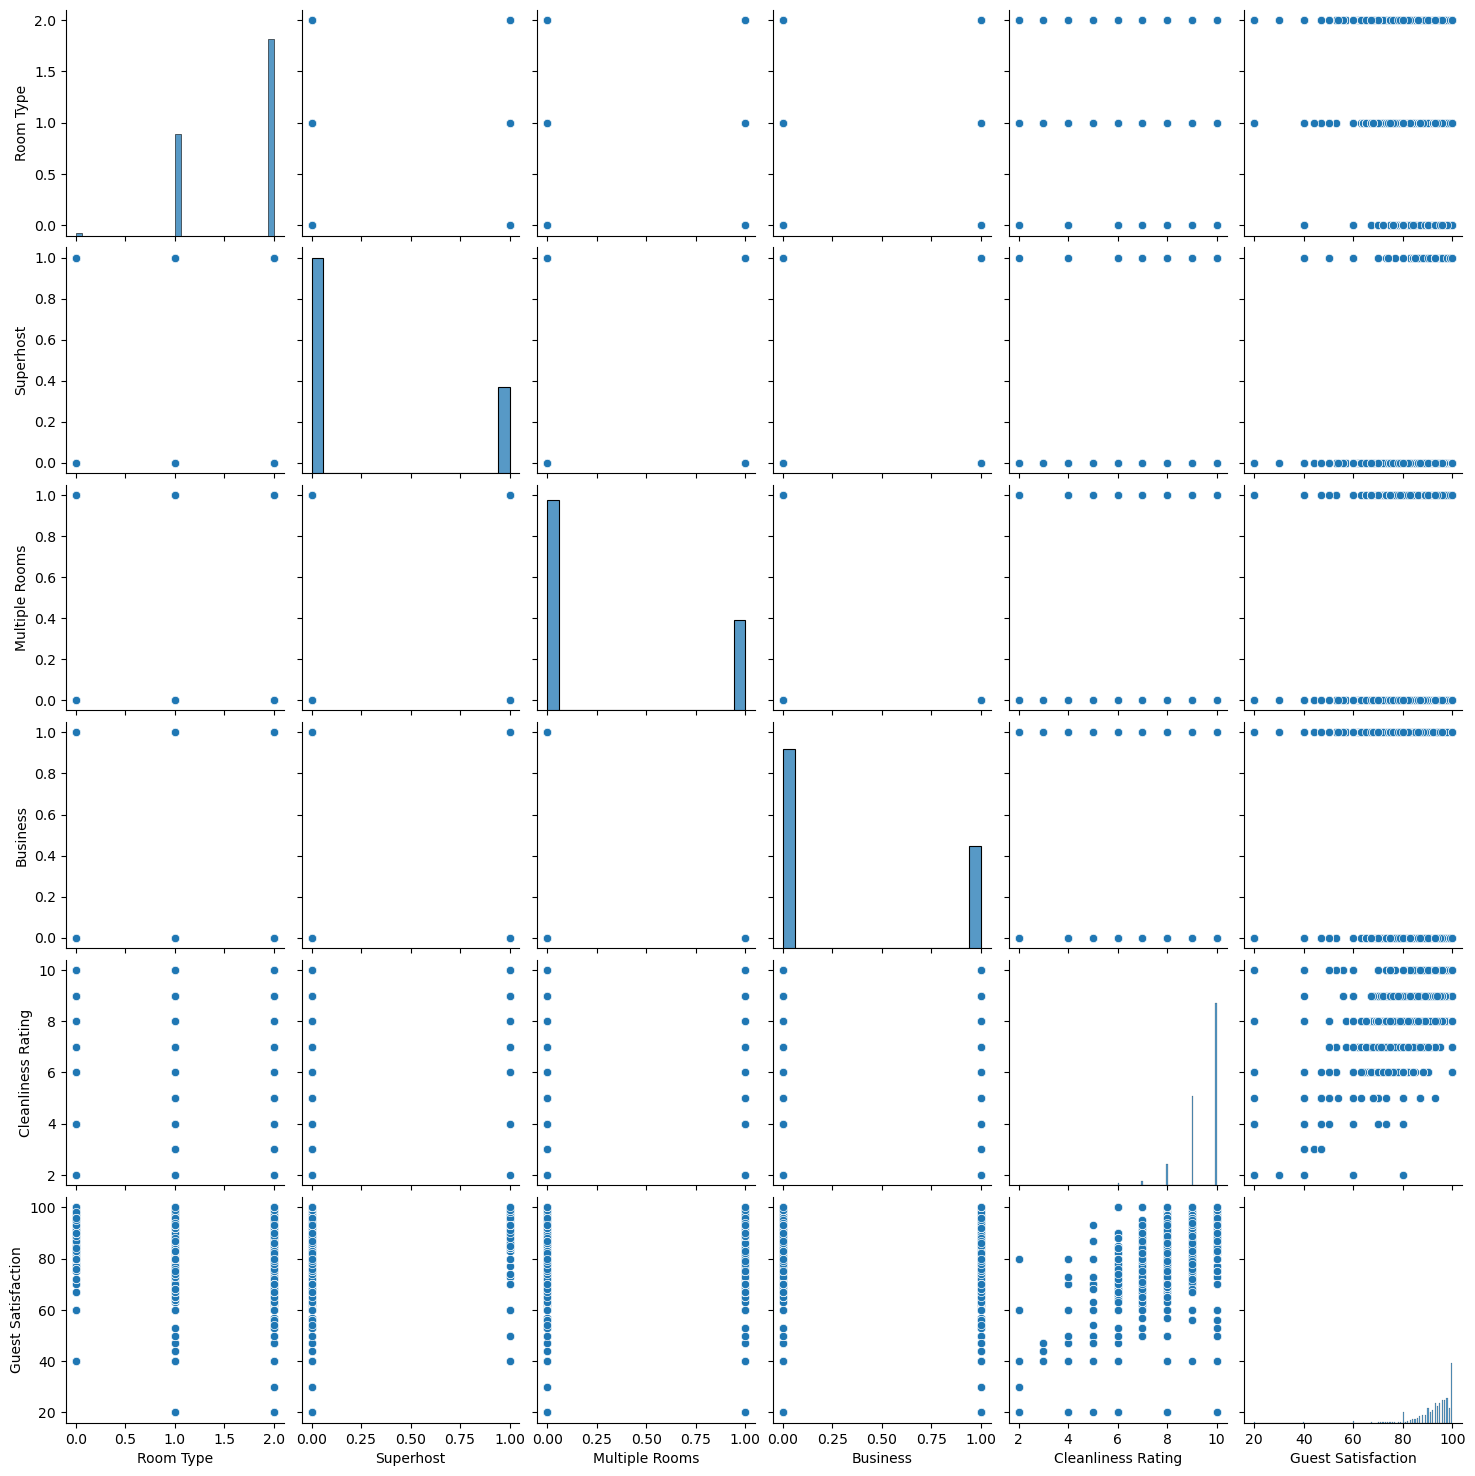

In [48]:
sns.pairplot(airbnb_df_7.select_dtypes(np.number))